In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf

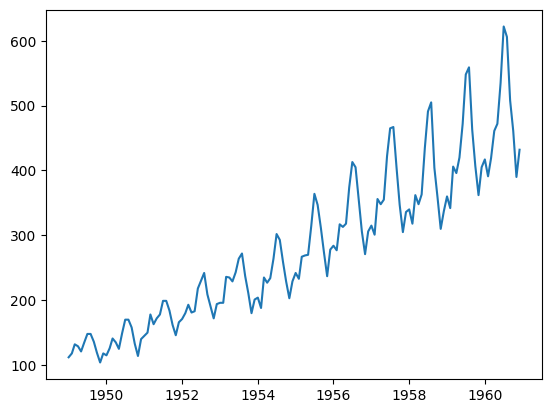

In [ ]:
link="https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df=pd.read_csv(link,parse_dates=["Month"])
df.set_index("Month",inplace=True)
plt.plot(df['Passengers'])




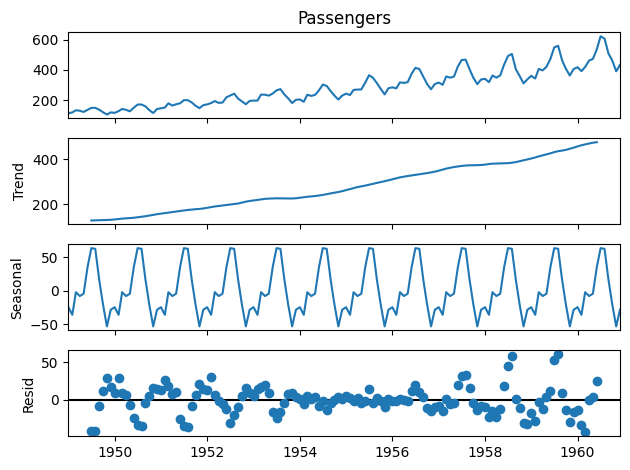

In [ ]:
decomposition = seasonal_decompose(df['Passengers'],model="Additive")
decomposition.plot()
seasonal_element=decomposition.seasonal
plt.show()

Plotting ACF


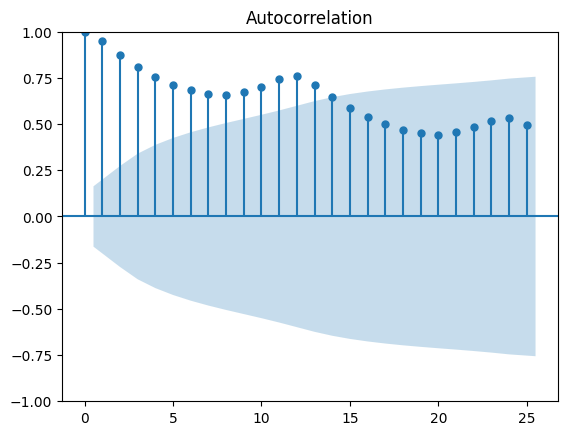

In [ ]:
plot_acf(df, lags=25,alpha=0.05)
plt.show()


Moving Average (Smoothing):

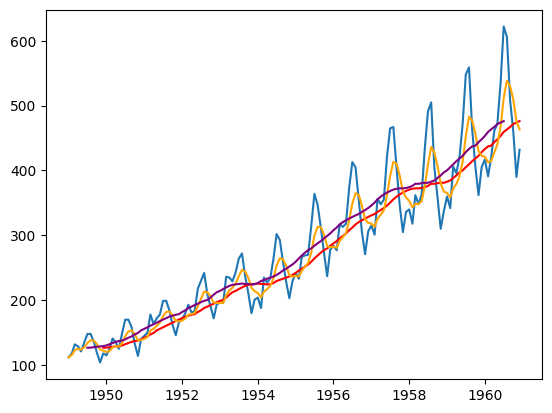

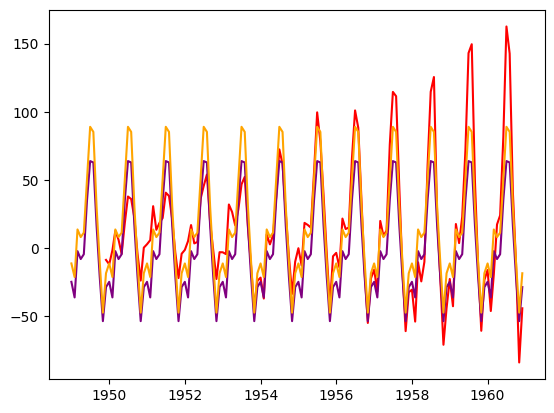

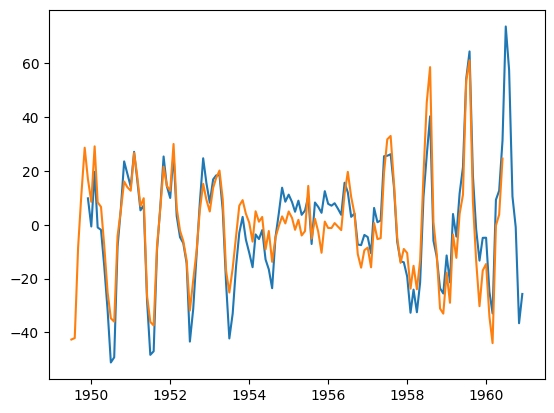

In [ ]:
df["MA12"] = df['Passengers'].rolling(window=12).mean()
df['EXP_MA']=df['Passengers'].ewm(span=6).mean()
df["MA12_center"] = df['Passengers'].rolling(window=12,center=True).mean()
plt.plot(df['Passengers'])
plt.plot(df['MA12'], color='Red')
plt.plot(df['EXP_MA'], color='Orange')
plt.plot(df['MA12_center'], color='Purple')
df['detrended']=df['Passengers']-df['MA12']

df['try']=df['Passengers']-df['EXP_MA']
residual_component = decomposition.resid
plt.figure()
plt.plot(df['detrended'],color='red')
plt.plot(seasonal_element, color='purple')
plt.plot(df['Seasonal'],color='orange')
plt.show()

plt.plot(df['res'])
plt.plot(residual_component)

Seasonal Mean


Durbin-Watson Statistic: 0.6311843790738115


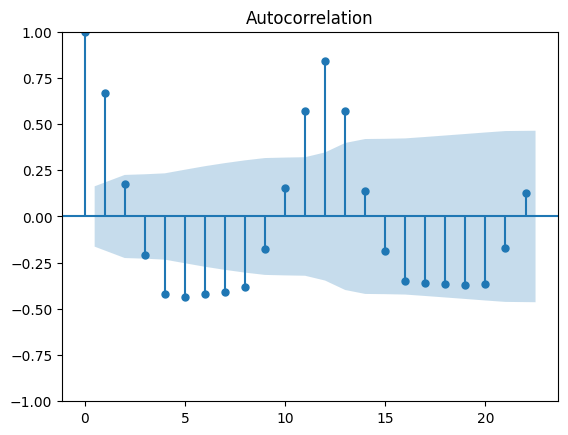

In [ ]:
#ROUGH
df['residuals'] = df['Passengers'] - df['EXP_MA']
# Drop NA values from the residuals
residuals_cleaned = df['residuals'].dropna()

# Calculate Durbin-Watson statistic
dw_stat = durbin_watson(residuals_cleaned)
print(f'Durbin-Watson Statistic: {dw_stat}')


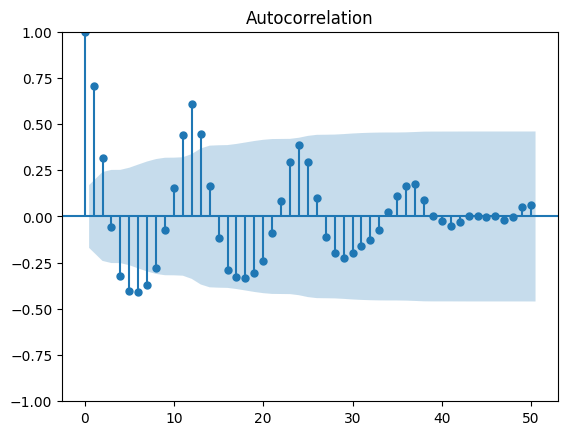

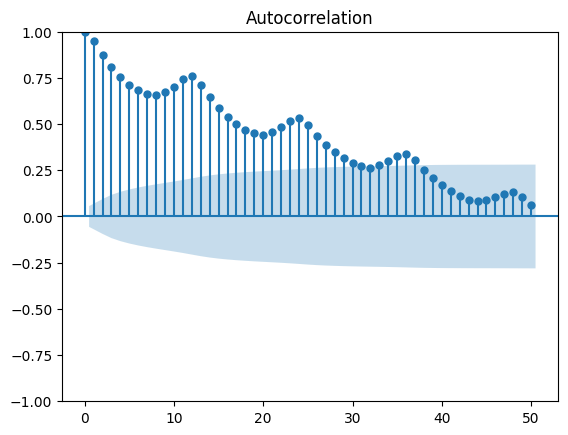

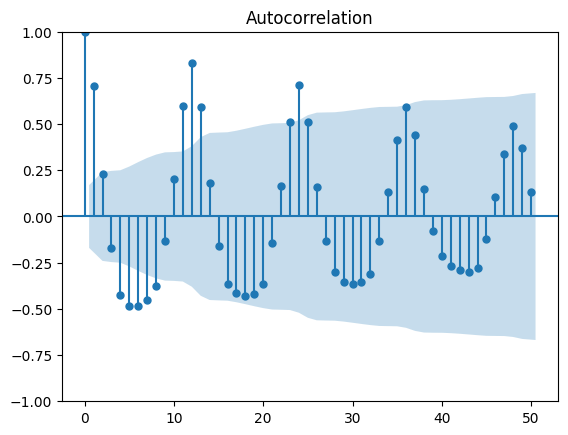

In [ ]:
seasonal_mean = df.groupby(df.index.month)['detrended'].mean()
df['Seasonal'] = df.index.month.map(seasonal_mean)
df['res']= df['detrended']-df['Seasonal']
plot_acf(df['res'].dropna(), lags=50,alpha=0.05)
plt.show()

plot_acf(df['Passengers'], lags=50,alpha=0.5)
plt.show()

plot_acf(df['detrended'].dropna(), lags=50)
plt.show()

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Calculate Durbin-Watson statistic for residuals
dw_stat = durbin_watson(residual_component.dropna())

print(f'Durbin-Watson statistic: {dw_stat}')


df['res2']=df['res'].rolling(window=20).mean()

dw_stat = durbin_watson(df['res2'].dropna())

print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 0.6416983422083634
Durbin-Watson statistic: 0.08816523971292387
